In [22]:
from ovm.tickers import (
    ETH_USD_TICKER,
    COMP_USD_TICKER,
    LINK_USD_TICKER,
    YFI_USD_TICKER,
    EOS_ETH_TICKER,
    MKR_ETH_TICKER,
    SNX_ETH_TICKER,
    TRX_ETH_TICKER,
    XRP_ETH_TICKER,
    ETC_ETH_TICKER,
    ETH_TICKER,
    USD_TICKER,
    get_ovl_quote_ticker,
)

import matplotlib.pyplot as plt

from ovm.time_resolution import (
    TimeResolution, 
    TimeScale
)

from ovm.monetary.plot_labels import (
    price_deviation_label,
    spot_price_label,
    futures_price_label,
    skew_label,
    inventory_wealth_ovl_label,
    inventory_wealth_usd_label,
    GINI_LABEL,
    GINI_ARBITRAGEURS_LABEL,
    SUPPLY_LABEL,
    TREASURY_LABEL,
    LIQUIDITY_LABEL, 
)

from ovm.monetary.data_collection import DataCollectionOptions

from ovm.monetary.plots import plot_single_variable_over_time_from_numpy_array

from ovm.paths import HistoricalDataSource

from ovm.monetary.data_io import construct_abs_data_input_with_historical_data

In [23]:
tickers = [
    EOS_ETH_TICKER,
    ETC_ETH_TICKER,
    MKR_ETH_TICKER,
    SNX_ETH_TICKER,
    TRX_ETH_TICKER,
    XRP_ETH_TICKER,
]
tickers

['EOS-ETH', 'ETC-ETH', 'MKR-ETH', 'SNX-ETH', 'TRX-ETH', 'XRP-ETH']

In [24]:
historical_data_source = HistoricalDataSource.KUCOIN
time_resolution = TimeResolution.FIFTEEN_MINUTES

In [25]:
DATA_COLLECTOR_NAME = 'data_collector'
data_collection_options = \
    DataCollectionOptions(compute_gini_coefficient=False,
                          compute_wealth=False,
                          compute_inventory_wealth=False, 
                          use_hdf5=True)

In [26]:
sims = construct_abs_data_input_with_historical_data(
            time_resolution=time_resolution,
            historical_data_source=historical_data_source,
            tickers=tickers)

In [27]:
type(sims)

ovm.monetary.data_io.AgentBasedSimulationInputData

In [28]:
sims.ticker_to_series_of_prices_map

{'EOS-ETH': array([0.010673, 0.01064 , 0.010946, ..., 0.002228, 0.002214, 0.002135]),
 'ETC-ETH': array([0.029268, 0.029   , 0.029292, ..., 0.005252, 0.005262, 0.005257]),
 'MKR-ETH': array([3.70594  , 3.7080696, 3.65     , ..., 1.5339   , 1.5233   ,
        1.5339   ]),
 'SNX-ETH': array([0.0009888, 0.0012102, 0.001205 , ..., 0.0078377, 0.0077913,
        0.0077913]),
 'TRX-ETH': array([1.089e-04, 9.350e-05, 9.600e-05, ..., 2.276e-05, 2.274e-05,
        2.250e-05]),
 'XRP-ETH': array([0.0035   , 0.0035   , 0.0029126, ..., 0.0002746, 0.0002746,
        0.0002733])}

In [29]:
plot_time_scale = TimeScale.YEARS
time_resolution

<TimeResolution.FIFTEEN_MINUTES: '15m'>

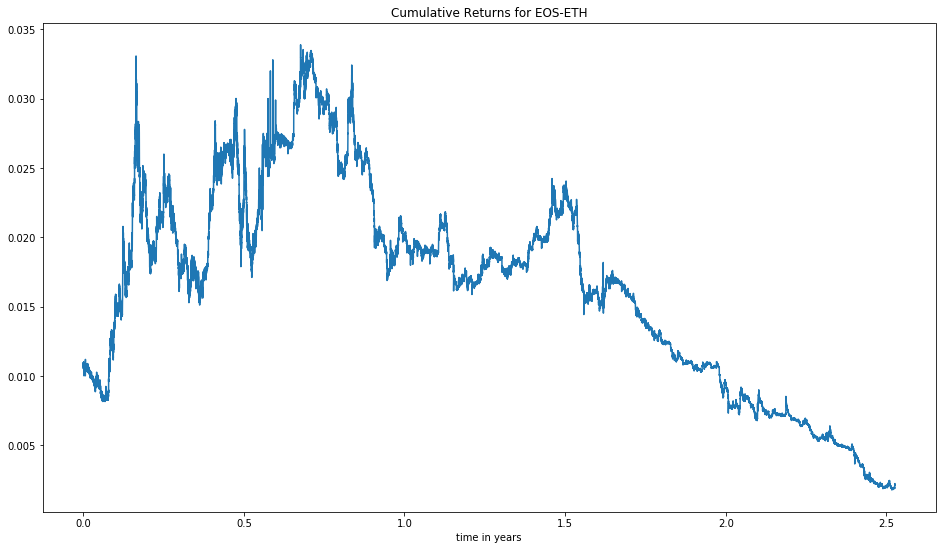

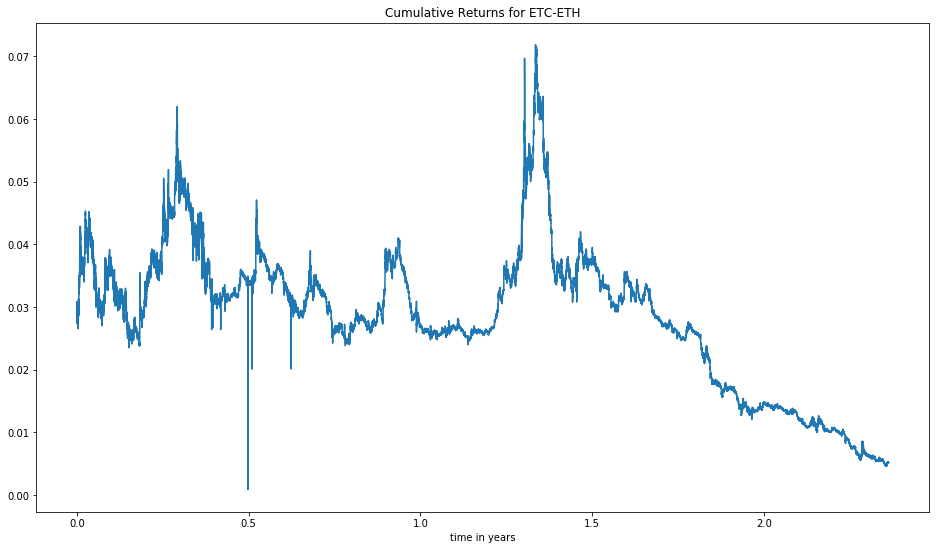

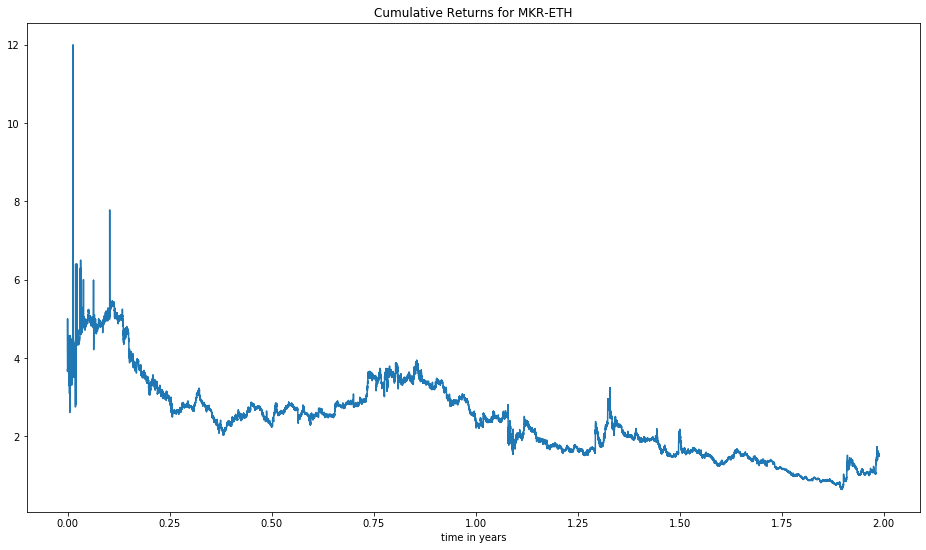

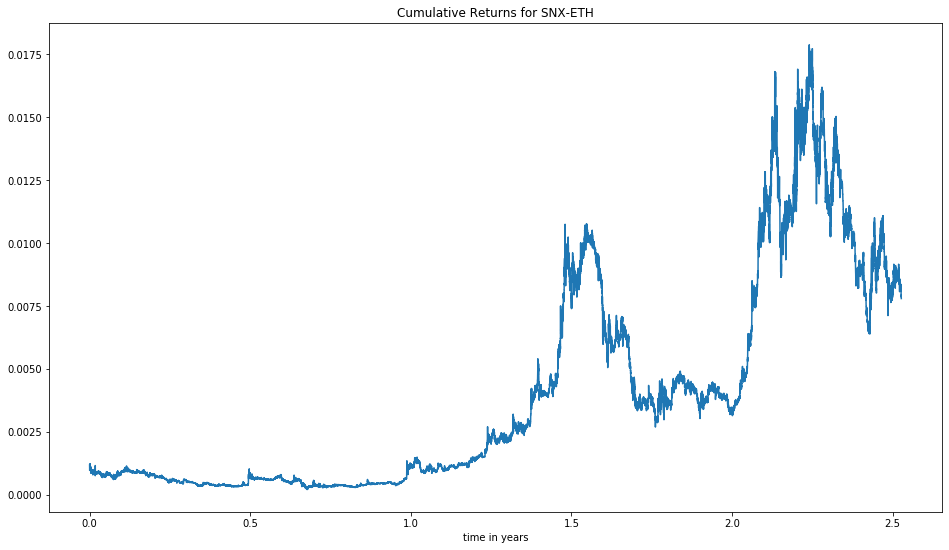

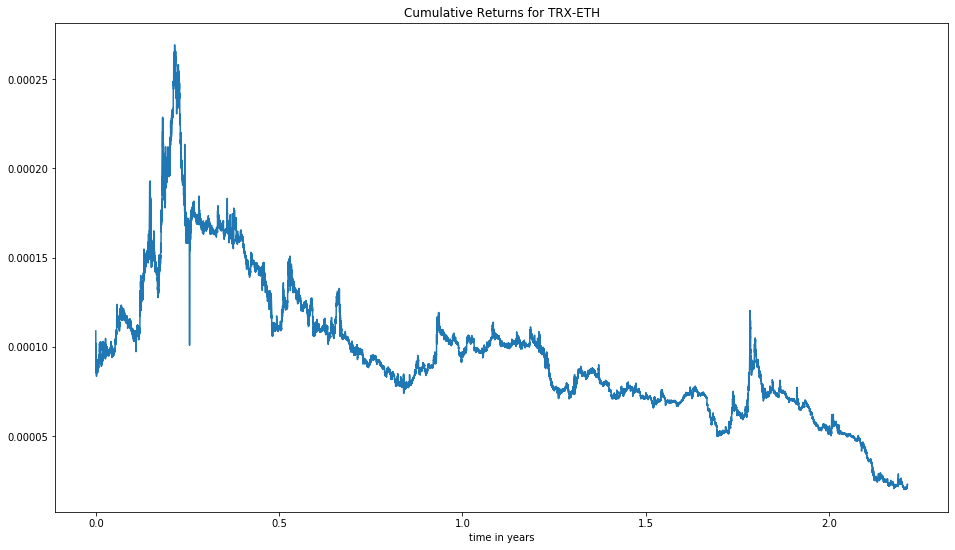

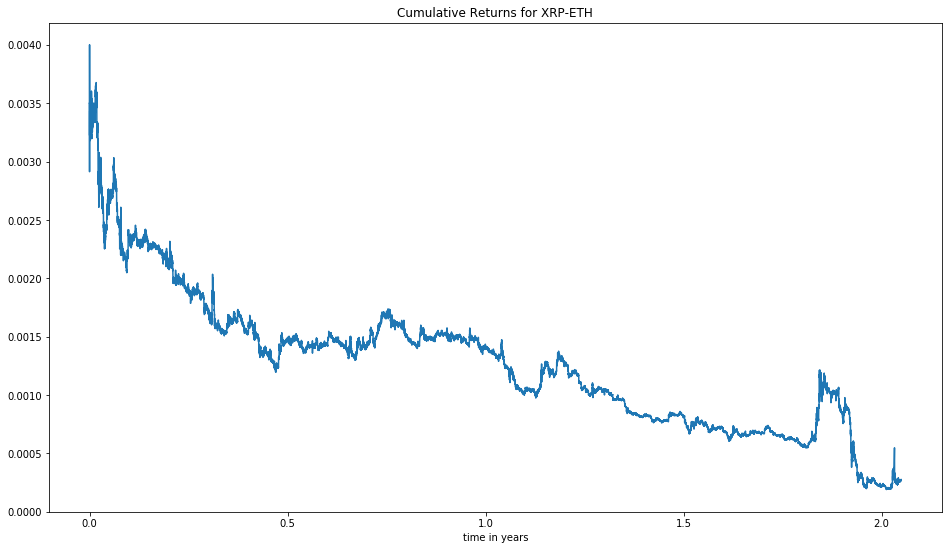

In [30]:
for ticker in tickers:
    plot_single_variable_over_time_from_numpy_array(
        array=sims.ticker_to_series_of_prices_map[ticker], 
            plot_time_scale=plot_time_scale,
            time_resolution=time_resolution, 
            time_interval_to_plot_in_seconds=None, 
            data_interval=data_collection_options.data_collection_interval)
    
    plt.title(f'Cumulative Returns for {ticker}')